In [1]:
import h5py

with h5py.File('my_sim02/output/v_report.h5', 'r') as f:
    v_data = f['report/cortex/data'][:, 0] # Voltage data 
    t_data = f['report/cortex/mapping/time'][:]  # Time data

print("Voltage data:", v_data)
print("Time data:", t_data)


Voltage data: [-79.99814646 -79.99638223 -79.99468848 ... -77.37361791 -77.37420826
 -77.37479862]
Time data: [0.e+00 3.e+03 1.e-03]


In [4]:
import h5py

with h5py.File('my_sim02/output/v_report.h5', 'r') as f:
    def print_structure(name, obj):
        print(name) 
        
    f.visititems(print_structure)

report
report/cortex
report/cortex/data
report/cortex/mapping
report/cortex/mapping/element_ids
report/cortex/mapping/element_pos
report/cortex/mapping/index_pointer
report/cortex/mapping/node_ids
report/cortex/mapping/time


Peak amplitude: 40.757536985554594
Trough amplitude: -87.01532489888949
Peak-to-peak amplitude: 127.77286188444408
Half-width of the action potential: 1.1070003690001613 ms


/opt/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


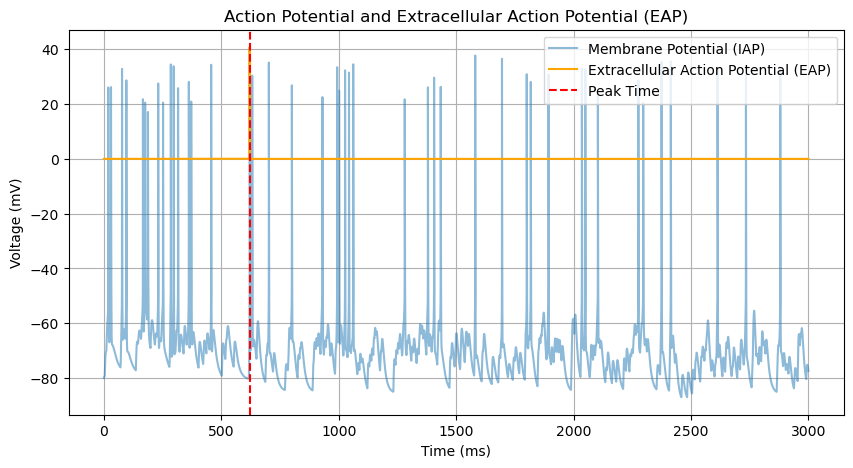

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

with h5py.File('my_sim02/output/v_report.h5', 'r') as f:
    v_data = f['report/cortex/data'][:, 0]  
    t_data = f['report/cortex/mapping/time'][:] 

voltage = np.array(v_data)
time = np.array(t_data)  

time = np.linspace(0, 3000, len(voltage)) 

# PEAK AMPLITUDE 
peak_amplitude = np.max(voltage)
trough_amplitude = np.min(voltage)
peak_to_peak_amplitude = peak_amplitude - trough_amplitude

print(f"Peak amplitude: {peak_amplitude}")
print(f"Trough amplitude: {trough_amplitude}")
print(f"Peak-to-peak amplitude: {peak_to_peak_amplitude}")

# Step 2: HALF-WIDTH 

peak_index = np.argmax(voltage)
peak_voltage = voltage[peak_index]

half_max = (peak_voltage - np.min(voltage)) / 2 + np.min(voltage)

crossing_indices = np.where(voltage[:peak_index] <= half_max)[0]
if len(crossing_indices) > 0:
    start_index = crossing_indices[-1]
else:
    start_index = 0 

crossing_indices = np.where(voltage[peak_index:] <= half_max)[0]
if len(crossing_indices) > 0:
    end_index = peak_index + crossing_indices[0]
else:
    end_index = len(voltage) - 1

half_width = time[end_index] - time[start_index]
print(f"Half-width of the action potential: {half_width} ms")

# EAP
t0 = time[peak_index]  
sigma = half_width / (2 * np.sqrt(2 * np.log(2)))  

eap = peak_amplitude * np.exp(-((time - t0) ** 2) / (2 * sigma ** 2))

plt.figure(figsize=(10, 5))
plt.plot(time, voltage, label='Membrane Potential (IAP)', alpha=0.5)
plt.plot(time, eap, label='Extracellular Action Potential (EAP)', color='orange')
plt.axvline(x=t0, color='r', linestyle='--', label='Peak Time')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.title('Action Potential and Extracellular Action Potential (EAP)')
plt.legend()
plt.grid()
plt.show()
